In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression


In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_excel("titanic.xls")

In [4]:
df=data.copy()

In [5]:
df.shape

(1309, 14)

In [6]:
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
sns.heatmap?

<AxesSubplot:>

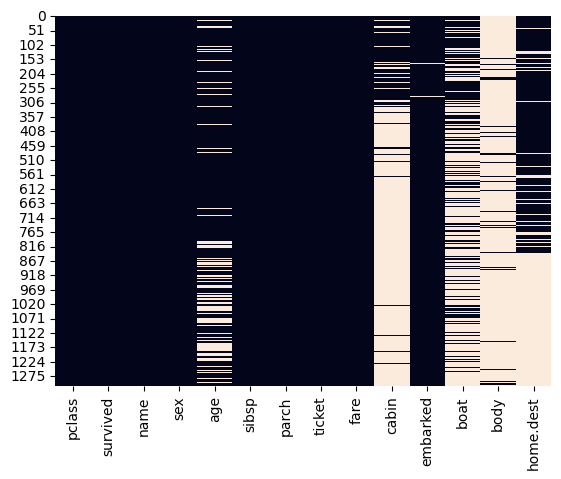

In [11]:
sns.heatmap(df.isnull(),cbar=False)

In [12]:
df["age"].fillna(df["age"].mean(),inplace=True)
df["cabin"].fillna("U",inplace=True) #'U'= Unknow
df["embarked"].fillna(str(df["embarked"].mode()),inplace=True)

In [13]:
df["fare"].fillna(df["fare"].mean(),inplace=True)

In [14]:
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])
df["cabin"]=df["cabin"].str[0].replace("[0-9]","",regex=True)
df["cabin"]=encoder.fit_transform(df["cabin"])

In [15]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,1,3,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,2,3,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,2,3,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,2,3,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,2,3,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
df.drop(["name","boat","ticket","body","home.dest"],axis=1,inplace=True)
df.shape

(1309, 9)

In [17]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

In [18]:
X=df.drop(["survived"],axis=1)
Y=df["survived"]

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
model.score(X_test,Y_test)

0.7977099236641222